Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by market capitalization, boasting over 200 million subscribers as of January 2021.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex our data manipulation skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. For their first order of business, they have been performing some analyses, and they believe that the average duration of movies has been declining.

As evidence of this, they have provided us with the following information. For the years from 2011 to 2020, the average movie durations are 103, 101, 99, 100, 100, 95, 95, 96, 93, and 90, respectively.

If we're going to be working with this data, we know a good place to start would be to probably start working with pandas. But first we'll need to create a DataFrame from scratch. Let's start by creating a Python object covered in Intermediate Python: a dictionary!

In [ ]:
!pip install pandas
!pip install matplotlib

In [ ]:
# Create the years and durations lists
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict =  {"years": years , "durations" : durations }

# Print the dictionary
print(movie_dict)

2. Creating a DataFrame from a dictionary
To convert our dictionary movie_dict to a pandas DataFrame, we will first need to import the library under its usual alias. We'll also want to inspect our DataFrame to ensure it was created correctly. Let's perform these steps now.

In [ ]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df =pd.DataFrame(movie_dict)

# Print the DataFrame
print(durations_df)

3. A visual inspection of our data
Alright, we now have a pandas DataFrame, the most common way to work with tabular data in Python. Now back to the task at hand. We want to follow up on our friend's assertion that movie lengths have been decreasing over time. A great place to start will be a visualization of the data.

Given that the data is continuous, a line plot would be a good choice, with the dates represented along the x-axis and the average length in minutes along the y-axis. This will allow us to easily spot any trends in movie durations. There are many ways to visualize data in Python, but matploblib.pyplot is one of the most common packages to do so.

<Figure size 640x480 with 0 Axes>

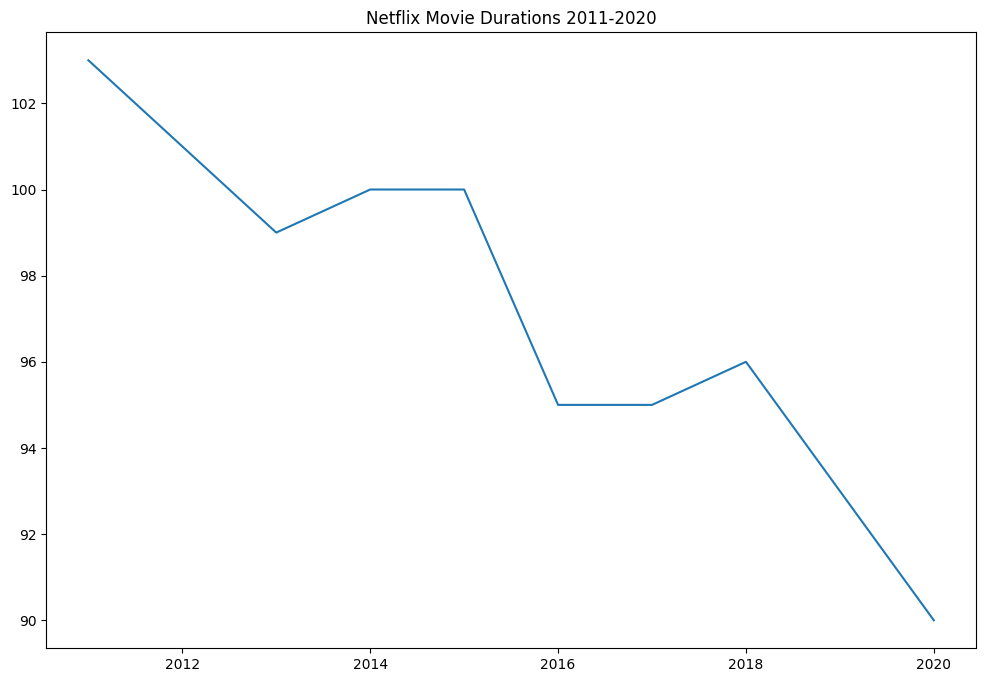

In [27]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()
fig = plt.figure(figsize=(12,8))

# Draw a line plot of release_years and durations
plt.plot(years, durations)

# Create a title
plt.title("Netflix Movie Durations 2011-2020")

# Show the plot
plt.show()

4. Loading the rest of the data from a CSV
Well, it looks like there is something to the idea that movie lengths have decreased over the past ten years! But equipped only with our friend's aggregations, we're limited in the further explorations we can perform. There are a few questions about this trend that we are currently unable to answer, including:

a. What does this trend look like over a longer period of time?
b. Is this explainable by something like the genre of entertainment?

Upon asking our friend for the original CSV they used to perform their analyses, they gladly oblige and send it. We now have access to the CSV file, available at the path "datasets/netflix_data.csv". Let's create another DataFrame, this time with all of the data. Given the length of our friend's data, printing the whole DataFrame is probably not a good idea, so we will inspect it by printing only the first five rows.

In [ ]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Print the first five rows of the DataFrame
print(netflix_df[0:5])

5. Filtering for movies!
Okay, we have our data! Now we can dive in and start looking at movie lengths.

Or can we? Looking at the first five rows of our new DataFrame, we notice a column type. Scanning the column, it's clear there are also TV shows in the dataset! Moreover, the duration column we planned to use seems to represent different values depending on whether the row is a movie or a show (perhaps the number of minutes versus the number of seasons)?

Fortunately, a DataFrame allows us to filter data quickly, and we can select rows where type is Movie. While we're at it, we don't need information from all of the columns, so let's create a new DataFrame netflix_movies containing only title, country, genre, release_year, and duration.

Let's put our data subsetting skills to work!

In [ ]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[['title', 'country', 'genre', 'release_year', 'duration']]

# Print the first five rows of the new DataFrame
print(netflix_movies_col_subset[0:5])

6. Creating a scatter plot
Okay, now we're getting somewhere. We've read in the raw data, selected rows of movies, and have limited our DataFrame to our columns of interest. Let's try visualizing the data again to inspect the data over a longer range of time.

This time, we are no longer working with aggregates but instead with individual movies. A line plot is no longer a good choice for our data, so let's try a scatter plot instead. We will again plot the year of release on the x-axis and the movie duration on the y-axis.

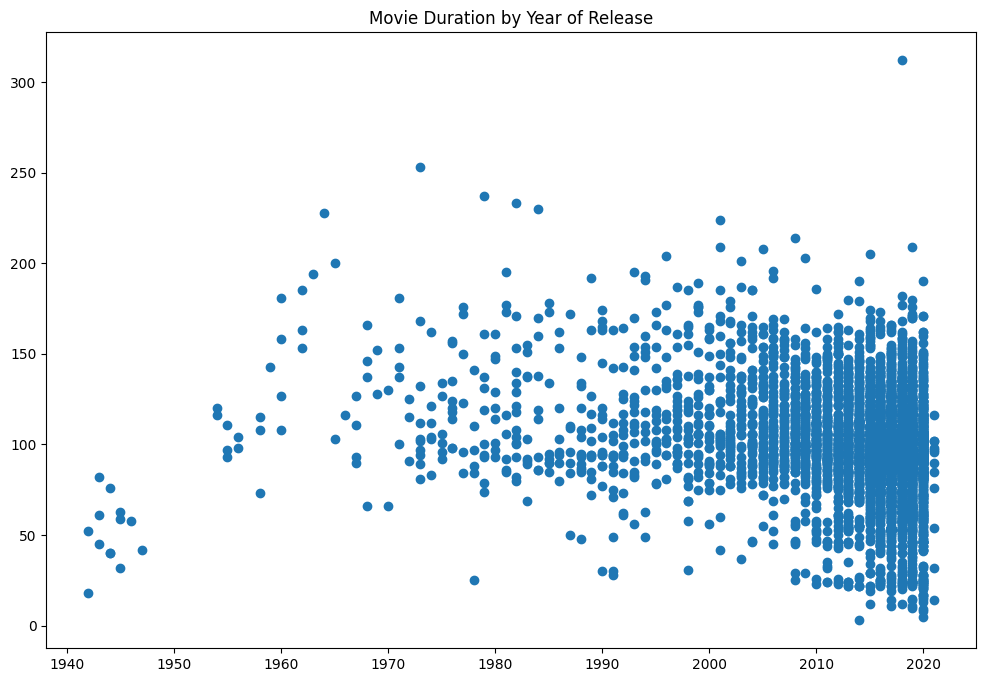

In [30]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
release_years = netflix_movies_col_subset['release_year']
durations = netflix_movies_col_subset['duration']

plt.scatter(release_years, durations)

# Create a title
plt.title("Movie Duration by Year of Release")


# Show the plot
plt.show()

7. Digging deeper
This is already much more informative than the simple plot we created when our friend first gave us some data. We can also see that, while newer movies are overrepresented on the platform, many short movies have been released in the past two decades.

Upon further inspection, something else is going on. Some of these films are under an hour long! Let's filter our DataFrame for movies with a duration under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.

In [ ]:
# Filter for durations shorter than 60 minutes
short_movies =netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60]

# Print the first 20 rows of short_movies
print(short_movies[0:20])

8. Marking non-feature films
Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.

We could eliminate these rows from our DataFrame and plot the values again. But another interesting way to explore the effect of these genres on our data would be to plot them, but mark them with a different color.

In Python, there are many ways to do this, but one fun way might be to use a loop to generate a list of colors based on the contents of the genre column. Much as we did in Intermediate Python, we can then pass this list to our plotting function in a later step to color all non-typical genres in a different color!

In [ ]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for index, row in netflix_movies_col_subset.iterrows() :
    if row['genre'] == "Children" :
        colors.append("red")
    elif row['genre'] == "Documentaries" :
        colors.append("blue")
    elif row['genre'] == "Stand-Up" :
        colors.append("green")
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
print(colors[0:10])